In [1]:
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np
from scipy import signal
import seaborn as sns
import pandas as pd
import os
import glob

import random
import IPython.display as ipd #Allows Audio files to be played directly in the notebook
import librosa #library we will to analyze sounds
import librosa.display #library module which helps visualize the waves


In [2]:
#Loading dataset
pcgdata = pd.read_csv('training_data.csv')


In [3]:
#Let's check how the data is distributed
pcgdata

,Patient ID,Locations,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur grading,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,III/VI,High,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,I/VI,Low,Blowing,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,II/VI,Low,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
939,85343,AV+PV+TV+MV,Child,Female,97.0,13.5,False,Present,MV+TV,TV,...,I/VI,Low,Blowing,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
940,85345,AV+PV,Child,Female,132.0,38.1,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN


In [4]:
df=pcgdata[pcgdata['Murmur']=="Unknown"]
df['Patient ID']


2       9983
9      29378
16     39456
28     49558
38     49607
       ...  
872    85229
908    85294
911    85300
921    85319
923    85322
Name: Patient ID, Length: 68, dtype: int64

In [5]:
pcgdata.columns


Index(['Patient ID', 'Locations', 'Age', 'Sex', 'Height', 'Weight',
       'Pregnancy status', 'Murmur', 'Murmur locations',
       'Most audible location', 'Systolic murmur timing',
       'Systolic murmur shape', 'Systolic murmur grading',
       'Systolic murmur pitch', 'Systolic murmur quality',
       'Diastolic murmur timing', 'Diastolic murmur shape',
       'Diastolic murmur grading', 'Diastolic murmur pitch',
       'Diastolic murmur quality', 'Campaign', 'Additional ID'],
      dtype='object')

In [6]:
pcgdata.shape

(942, 22)

In [7]:
pcgdata['Patient ID'][0]

2530

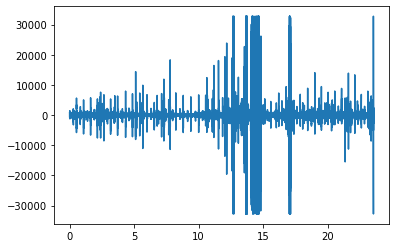

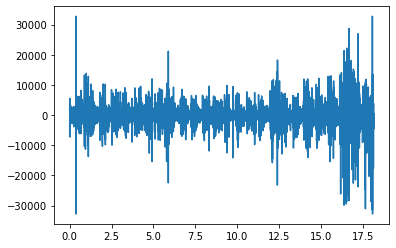

In [8]:
from scipy.io import wavfile
frequency, recording = wavfile.read('downloads/training_data/2530_AV.wav')
ind = np.arange(recording.size)
t=ind*(1/frequency)
plt.plot(t,recording)
plt.show()
frequency, recording = wavfile.read('downloads/training_data/9979_AV.wav')
ind = np.arange(recording.size)
t=ind*(1/frequency)
plt.plot(t,recording)
plt.show()

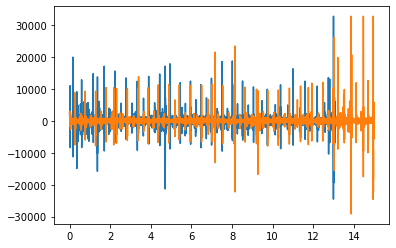

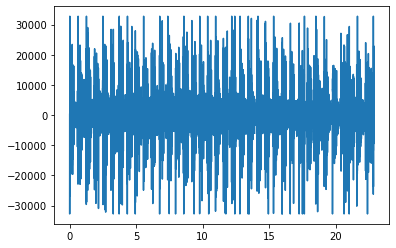

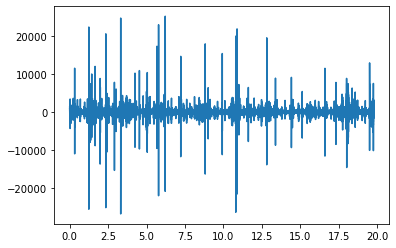

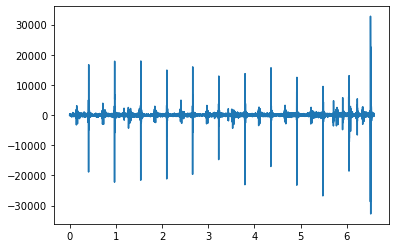

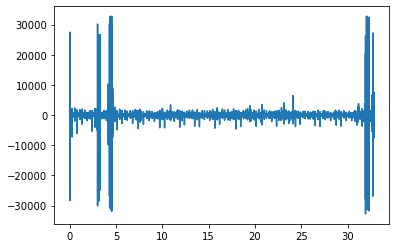

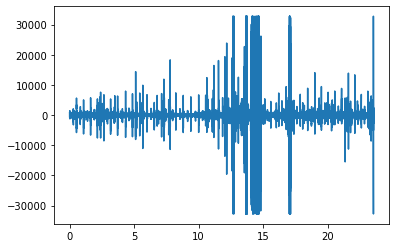

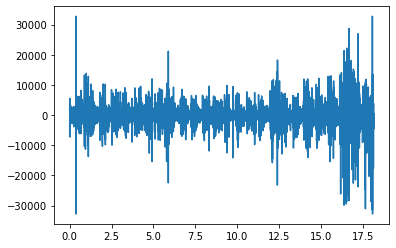

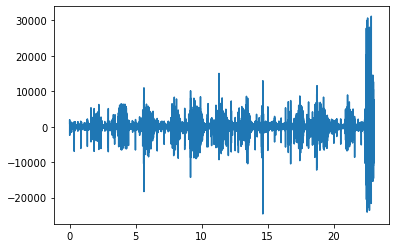

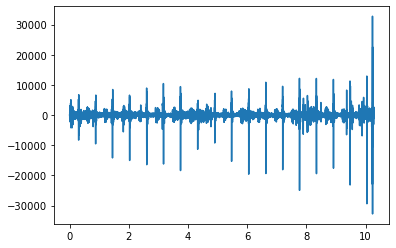

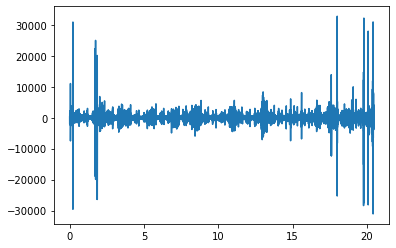

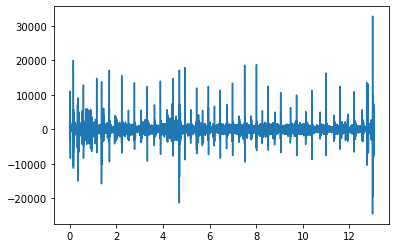

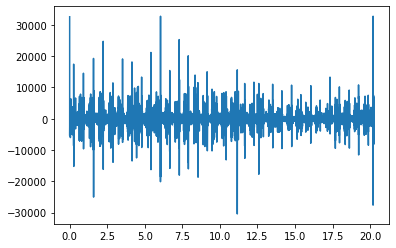

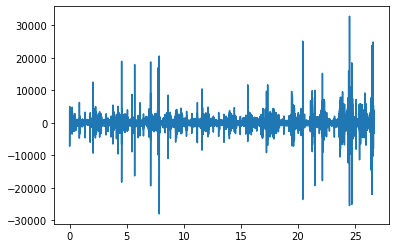

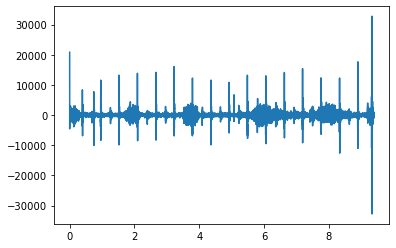

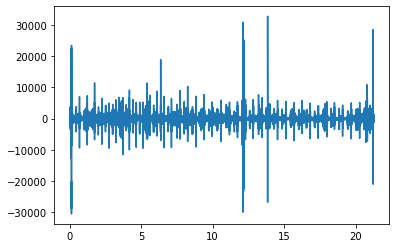

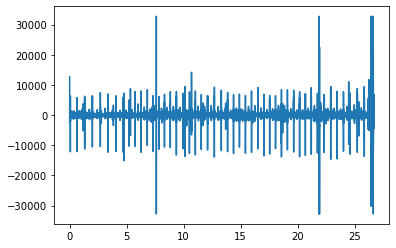

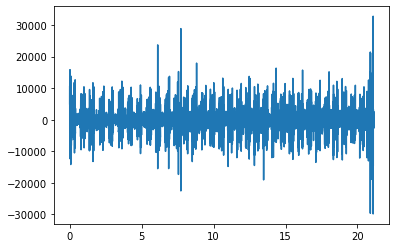

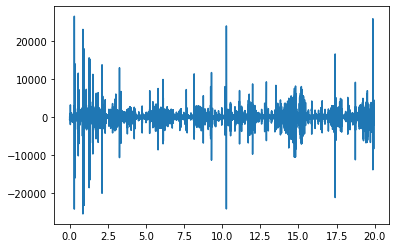

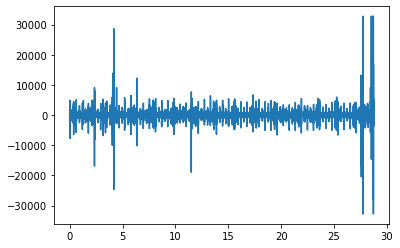

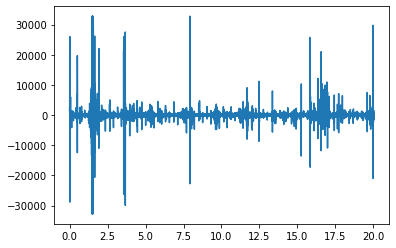

In [9]:
from scipy.io import wavfile
frequency, recording = wavfile.read('downloads/training_data/2530_PV.wav')
ind = np.arange(recording.size)
t=ind*(1/frequency)
plt.plot(t,recording)

for i in range(5):
    frequency, recording = wavfile.read('downloads/training_data/'+str(pcgdata['Patient ID'][i])+'_TV.wav')
    ind = np.arange(recording.size)
    t=ind*(1/frequency)
    plt.plot(t,recording)
    plt.show()
for i in range(5):
    frequency, recording = wavfile.read('downloads/training_data/'+str(pcgdata['Patient ID'][i])+'_AV.wav')
    ind = np.arange(recording.size)
    t=ind*(1/frequency)
    plt.plot(t,recording)
    plt.show()
for i in range(5):
    frequency, recording = wavfile.read('downloads/training_data/'+str(pcgdata['Patient ID'][i])+'_PV.wav')
    ind = np.arange(recording.size)
    t=ind*(1/frequency)
    plt.plot(t,recording)
    plt.show()

for i in range(5):
    frequency, recording = wavfile.read('downloads/training_data/'+str(pcgdata['Patient ID'][i])+'_MV.wav')
    ind = np.arange(recording.size)
    t=ind*(1/frequency)
    plt.plot(t,recording)
    plt.show()



### Data Preprocessing

In [10]:
pcgdata.isnull().any()

Patient ID                  False
Locations                   False
Age                          True
Sex                         False
Height                       True
Weight                       True
Pregnancy status            False
Murmur                      False
Murmur locations             True
Most audible location        True
Systolic murmur timing       True
Systolic murmur shape        True
Systolic murmur grading      True
Systolic murmur pitch        True
Systolic murmur quality      True
Diastolic murmur timing      True
Diastolic murmur shape       True
Diastolic murmur grading     True
Diastolic murmur pitch       True
Diastolic murmur quality     True
Campaign                    False
Additional ID                True
dtype: bool

In [11]:
pcgdata=pcgdata.interpolate()

pcgdata.fillna("other", inplace = True)


In [12]:
pcgdata.isnull().any()

Patient ID                  False
Locations                   False
Age                         False
Sex                         False
Height                      False
Weight                      False
Pregnancy status            False
Murmur                      False
Murmur locations            False
Most audible location       False
Systolic murmur timing      False
Systolic murmur shape       False
Systolic murmur grading     False
Systolic murmur pitch       False
Systolic murmur quality     False
Diastolic murmur timing     False
Diastolic murmur shape      False
Diastolic murmur grading    False
Diastolic murmur pitch      False
Diastolic murmur quality    False
Campaign                    False
Additional ID               False
dtype: bool

In [13]:
pcgdata

,Patient ID,Locations,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur grading,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,other,other,...,other,other,other,other,other,other,other,other,CC2015,other
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,III/VI,High,Harsh,other,other,other,other,other,CC2015,other
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,other,other,...,other,other,other,other,other,other,other,other,CC2015,other
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,I/VI,Low,Blowing,other,other,other,other,other,CC2015,other
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,II/VI,Low,Harsh,other,other,other,other,other,CC2015,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,other,other,...,other,other,other,other,other,other,other,other,CC2015,50688.0
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,other,other,...,other,other,other,other,other,other,other,other,CC2015,50688.0
939,85343,AV+PV+TV+MV,Child,Female,97.0,13.5,False,Present,MV+TV,TV,...,I/VI,Low,Blowing,other,other,other,other,other,CC2015,50688.0
940,85345,AV+PV,Child,Female,132.0,38.1,False,Absent,other,other,...,other,other,other,other,other,other,other,other,CC2015,50688.0


In [14]:
#use one hot encoding for age,sex,locations,Murmur

In [15]:
pcgdata['Age'].unique()

array(['Child', 'Young Adult', 'Infant', 'Adolescent', 'other', 'Neonate'],
      dtype=object)

dummies = pd.get_dummies(pcgdata.Age)
dummies.head(3)
pcgdata1 = pd.concat([pcgdata,dummies],axis='columns')
pcgdata1.head()
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features[0])
X=ohe.fit_transform(X).toarray()

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:

dfle=pcgdata
dfle.Age=le.fit_transform(dfle.Age)
dfle.Sex=le.fit_transform(dfle.Sex)
dfle.Locations=le.fit_transform(dfle.Locations)


dfle.Murmur=le.fit_transform(dfle.Murmur) 
      
pcgdata=dfle.drop(['Patient ID','Additional ID','Campaign'],axis="columns")


In [18]:
pcgdata

,Locations,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,Systolic murmur timing,Systolic murmur shape,Systolic murmur grading,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality
0,14,1,0,98.0,15.9,False,0,other,other,other,other,other,other,other,other,other,other,other,other
1,14,1,0,103.0,13.1,False,1,AV+MV+PV+TV,TV,Holosystolic,Diamond,III/VI,High,Harsh,other,other,other,other,other
2,14,1,1,115.0,19.1,False,2,other,other,other,other,other,other,other,other,other,other,other,other
3,14,1,1,98.0,15.9,False,1,TV,TV,Holosystolic,Plateau,I/VI,Low,Blowing,other,other,other,other,other
4,14,1,1,87.0,11.2,False,1,AV+MV+PV+TV,PV,Early-systolic,Plateau,II/VI,Low,Harsh,other,other,other,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,14,1,1,105.0,16.6,False,0,other,other,other,other,other,other,other,other,other,other,other,other
938,14,1,1,92.0,15.2,False,0,other,other,other,other,other,other,other,other,other,other,other,other
939,14,1,0,97.0,13.5,False,1,MV+TV,TV,Early-systolic,Plateau,I/VI,Low,Blowing,other,other,other,other,other
940,9,1,0,132.0,38.1,False,0,other,other,other,other,other,other,other,other,other,other,other,other


In [19]:
import warnings                              #removes the future warning tabs
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



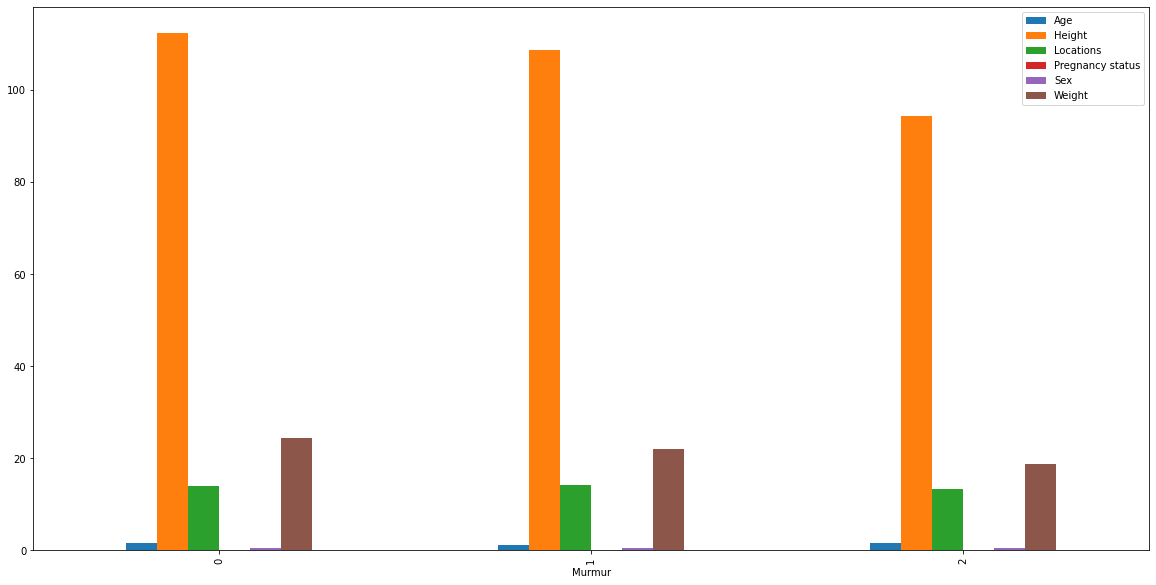

In [20]:
class_pivot =pcgdata.pivot_table(index='Murmur')
class_pivot.plot.bar(figsize=(20,10))
plt.show()

<AxesSubplot:>

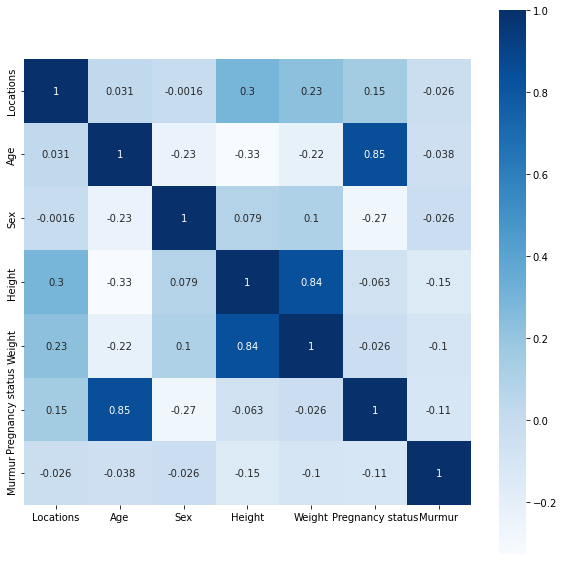

In [21]:
correlation = pcgdata.corr()

import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

### Feature Extraction

In [22]:
cols=['Locations', 'Age', 'Sex', 'Height', 'Weight', 'Pregnancy status']
X=pcgdata[cols]
y=pcgdata['Murmur']

In [23]:
X.describe()

,Locations,Age,Sex,Height,Weight
count,942.000000,942.000000,942.000000,942.000000,942.000000
mean,14.013800,1.481953,0.484076,110.410297,23.504148
std,4.414836,1.179525,0.500012,29.580253,15.124395
min,0.000000,0.000000,0.000000,35.000000,2.300000
25%,14.000000,1.000000,0.000000,89.000000,12.600000
50%,14.000000,1.000000,0.000000,114.000000,20.400000
75%,14.000000,2.000000,1.000000,132.660714,30.800000
max,27.000000,5.000000,1.000000,180.000000,110.800000


In [24]:
X.head()

,Locations,Age,Sex,Height,Weight,Pregnancy status
0,14,1,0,98.0,15.9,False
1,14,1,0,103.0,13.1,False
2,14,1,1,115.0,19.1,False
3,14,1,1,98.0,15.9,False
4,14,1,1,87.0,11.2,False


In [25]:
from sklearn.model_selection import train_test_split

#all_X=pcgdata[cols]
#all_y=pcgdata['Murmur']

all_X=X
all_y=y

#train_X,test_X,train_y,test_y=train_test_split(all_X,all_y,test_size=0.25,random_state=0)

#train_X,test_X,train_y,test_y=train_test_split(all_X,all_y,test_size=0.4,random_state=0)

train_X,test_X,train_y,test_y=train_test_split(all_X,all_y,test_size=0.1,random_state=0)
train_X.shape

(847, 6)

## knn model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knnmodel = KNeighborsClassifier(n_neighbors=20)

knnmodel.fit(train_X,train_y)
predictions=knnmodel.predict(test_X)


In [27]:
from sklearn.metrics import accuracy_score


accuracy_knnm=accuracy_score(test_y,predictions)
print(accuracy_knnm)

0.7368421052631579


In [28]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(knnmodel,all_X,all_y,cv=10)
scores.sort()
accuracy_knn=scores.mean()
    
print(scores)
print(accuracy_knn)

[0.72340426 0.73404255 0.73404255 0.73404255 0.73404255 0.73404255
 0.73404255 0.73684211 0.73684211 0.74468085]
0.734602463605823


In [29]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, predictions) 
cm

array([[70,  0,  0],
       [18,  0,  0],
       [ 7,  0,  0]], dtype=int64)

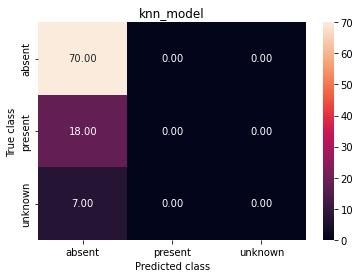

In [30]:
# heat map

sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["absent","present","unknown"] , yticklabels = ["absent","present","unknown"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('knn_model')
plt.savefig('knn_model')

## Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier(max_depth = 6).fit(train_X, train_y) 
dtree_predictions = dtree_model.predict(test_X)

  


In [32]:
from sklearn.metrics import accuracy_score


accuracy_dtm=accuracy_score(test_y,dtree_predictions)
print(accuracy_dtm)

0.7368421052631579


In [33]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dtree_model,all_X,all_y,cv=10)
scores.sort()
accuracy_dt=scores.mean()
    
print(scores)
print(accuracy_dt)

[0.69473684 0.70212766 0.71276596 0.71276596 0.71276596 0.72340426
 0.72631579 0.73404255 0.74468085 0.74468085]
0.7208286674132139


In [34]:
# creating a confusion matrix 
cm = confusion_matrix(test_y, dtree_predictions) 
cm

array([[69,  0,  1],
       [16,  1,  1],
       [ 7,  0,  0]], dtype=int64)

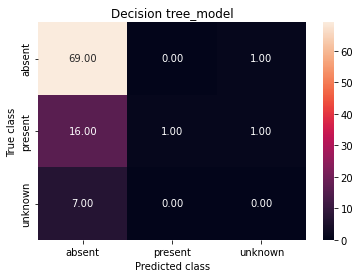

In [35]:
# heat map

sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["absent","present","unknown"] , yticklabels = ["absent","present","unknown"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision tree_model')
plt.savefig('Decision tree_model')

## svm model

In [36]:
from sklearn.svm import SVC
svcmodel = SVC(kernel='rbf')
svcmodel.fit(train_X,train_y)
prediction = svcmodel.predict(test_X)
accuracy_svcm= accuracy_score(test_y,prediction) # can use for test or train
print(accuracy_svcm)

0.7368421052631579


In [37]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(svcmodel,all_X,all_y,cv=10)
scores.sort()
accuracy_svc=scores.mean()
    
print(scores)
print(accuracy_svc)

[0.73404255 0.73404255 0.73404255 0.73404255 0.73404255 0.73684211
 0.73684211 0.74468085 0.74468085 0.74468085]
0.7377939529675251


In [38]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, prediction) 
cm

array([[70,  0,  0],
       [18,  0,  0],
       [ 7,  0,  0]], dtype=int64)

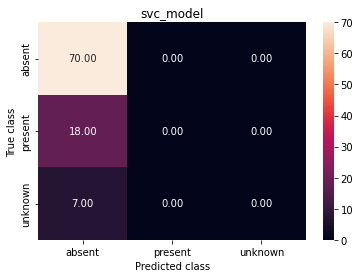

In [39]:
# heat map

sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["absent","present","unknown"] , yticklabels = ["absent","present","unknown"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('svc_model')
plt.savefig('svc_model')

### Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
randommodel = RandomForestClassifier(max_depth=8)
randommodel.fit(train_X,train_y)
prediction_randommodel = randommodel.predict(test_X)
accuracy_randommodel= accuracy_score(test_y,prediction_randommodel) # can use for test or train
print(accuracy_randommodel)



0.7368421052631579


In [41]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(randommodel,all_X,all_y,cv=10)
scores.sort()
accuracy_rf=scores.mean()
    
print(scores)
print(accuracy_rf)

[0.71276596 0.71578947 0.72340426 0.73404255 0.73404255 0.73404255
 0.73404255 0.73404255 0.73684211 0.74468085]
0.7303695408734603


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, prediction_randommodel) 
cm

array([[70,  0,  0],
       [17,  0,  1],
       [ 7,  0,  0]], dtype=int64)

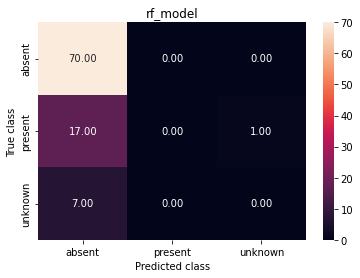

In [43]:
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["absent","present","unknown"] , yticklabels = ["absent","present","unknown"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('rf_model')
plt.savefig('rf_model')

###  Guassian Naive bayes classifier

In [44]:
from sklearn.naive_bayes import GaussianNB
gaussianmodel=  GaussianNB()
gaussianmodel.fit(train_X,train_y)
prediction_gaussianmodel = gaussianmodel.predict(test_X)
accuracy_gaussianmodel= accuracy_score(test_y,prediction_gaussianmodel) # can use for test or train
print(accuracy_gaussianmodel)

0.6105263157894737


In [45]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(gaussianmodel,all_X,all_y,cv=10)
scores.sort()
accuracy_gnb=scores.mean()
    
print(scores)
print(accuracy_gnb)

[0.22340426 0.4        0.53191489 0.55789474 0.60638298 0.61702128
 0.67021277 0.69148936 0.71276596 0.73404255]
0.5745128779395297


In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, prediction_randommodel) 
cm
type(prediction_randommodel)

numpy.ndarray

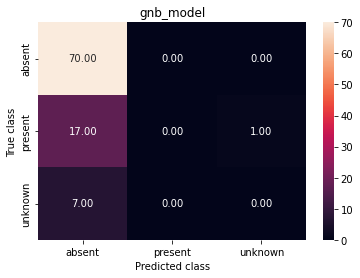

In [47]:
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["absent","present","unknown"] , yticklabels = ["absent","present","unknown"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('gnb_model')
plt.savefig('gnb_model')

### Neural network keras model

In [48]:
x_train=train_X
x_test=test_X
y_train=train_y
y_test=test_y

In [49]:
len(x_train.columns)

6

In [50]:
x_test.shape

(95, 6)

In [51]:
y_train


698    0
345    0
346    0
906    0
34     0
      ..
835    0
192    1
629    0
559    2
684    0
Name: Murmur, Length: 847, dtype: int32

In [52]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(6,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
     keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
x_train=np.asarray(x_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)
model.fit(x_train,y_train,epochs=20)

C:\Users\SAIJOS~1\AppData\Local\Temp/ipykernel_19224/3752062663.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train=np.asarray(x_train).astype(np.int)
C:\Users\SAIJOS~1\AppData\Local\Temp/ipykernel_19224/3752062663.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check t

Epoch 1/20
27/27 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.6612
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7379
Epoch 3/20
27/27 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7379
Epoch 4/20
27/27 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7379
Epoch 5/20
27/27 [==============================] - 0s 571us/step - loss: 0.0000e+00 - accuracy: 0.7379
Epoch 6/20
27/27 [==============================] - 0s 520us/step - loss: 0.0000e+00 - accuracy: 0.7379
Epoch 7/20
27/27 [==============================] - 0s 915us/step - loss: 0.0000e+00 - accuracy: 0.7379
Epoch 8/20
27/27 [==============================] - 0s 909us/step - loss: 0.0000e+00 - accuracy: 0.7379
Epoch 9/20
27/27 [==============================] - 0s 672us/step - loss: 0.0000e+00 - accuracy: 0.7379
Epoch 10/20
27/27 [==============================] - 0s 1ms/step - loss:

In [53]:
x_test=np.asarray(x_test).astype(np.int)

y_test=np.asarray(y_test).astype(np.int)
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


C:\Users\SAIJOS~1\AppData\Local\Temp/ipykernel_19224/439760322.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test=np.asarray(x_test).astype(np.int)
C:\Users\SAIJOS~1\AppData\Local\Temp/ipykernel_19224/439760322.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rel

accuracy: 73.68%


# Using pytorch and adding extra features

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision

from torch.utils.data import TensorDataset,DataLoader

In [55]:
pcgdata = pd.read_csv('training_data.csv')


In [56]:
audios = glob.glob(os.path.join("downloads/training_data/*.wav"), recursive=True)

print(f"Total Audio Files : {len(audios)}")

Total Audio Files : 3163


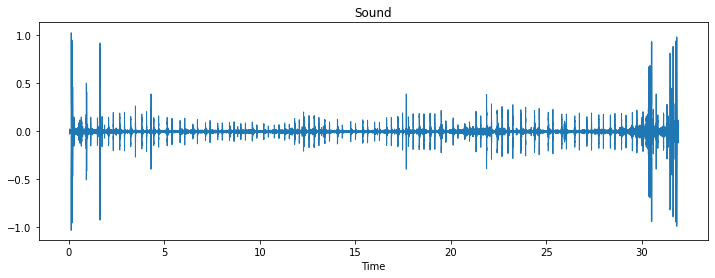

In [57]:

plt.figure(figsize=(12,4))

play_audio = random.choice(audios)
data, sample_rate = librosa.load(play_audio)
librosa.display.waveshow(data)
plt.title("Sound")
ipd.Audio(play_audio)

In [58]:
import struct

def read_file_properties(filename):
  wave_file = open(filename,"rb")
        
  riff = wave_file.read(12)
  fmt = wave_file.read(36)
  
  num_channels_string = fmt[10:12]
  num_channels = struct.unpack('<H', num_channels_string)[0]

  sample_rate_string = fmt[12:16]
  sample_rate = struct.unpack("<I",sample_rate_string)[0]
  
  bit_depth_string = fmt[22:24]
  bit_depth = struct.unpack("<H",bit_depth_string)[0]

  return (num_channels, sample_rate, bit_depth)

In [59]:
from tqdm.notebook import tqdm 
c=0
for index,row in tqdm(pcgdata.iterrows()):
    class_label = row.values[7]
    c=c+1
    print(class_label)
c    

0it [00:00, ?it/s]

Absent
Present
Unknown
Present
Present
Absent
Absent
Absent
Present
Unknown
Absent
Present
Present
Absent
Absent
Absent
Unknown
Absent
Absent
Present
Absent
Present
Present
Present
Absent
Present
Present
Present
Unknown
Absent
Absent
Absent
Present
Present
Absent
Absent
Present
Absent
Unknown
Absent
Unknown
Absent
Present
Present
Present
Absent
Unknown
Absent
Absent
Absent
Absent
Unknown
Absent
Absent
Absent
Present
Absent
Present
Absent
Absent
Absent
Absent
Present
Present
Present
Unknown
Absent
Absent
Present
Present
Present
Absent
Absent
Present
Absent
Absent
Present
Absent
Absent
Absent
Absent
Absent
Present
Present
Absent
Present
Absent
Absent
Absent
Absent
Absent
Present
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Present
Absent
Absent
Present
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Unknown
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Absent
Present
Pr

942

In [60]:
def extract_features(file_name, n_mfcc=40):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
    return mfccsscaled

In [61]:
features = []
class_label='Absent'
data = extract_features(audios[0])
features.append([data, class_label])
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
featuresdf

,feature,class_label
0,"[-394.47003, 189.16093, 49.802223, -27.825954,...",Absent


In [62]:
#Takes time
from tqdm.notebook import tqdm 

features = []
for index,row in tqdm(pcgdata.iterrows()):
    file_path_TV ='downloads/training_data/'+str(pcgdata['Patient ID'][index])+'_TV.wav'
    file_path_PV ='downloads/training_data/'+str(pcgdata['Patient ID'][index])+'_PV.wav'
    file_path_MV ='downloads/training_data/'+str(pcgdata['Patient ID'][index])+'_MV.wav'
    file_path_AV ='downloads/training_data/'+str(pcgdata['Patient ID'][index])+'_AV.wav'
    class_label = row.values[7]
    Age=row.values[2]
    Sex=row.values[3]
    Height=row.values[4]
    Weight=row.values[5]
    Pregnancy_status=row.values[6]
    try:
      data1 = extract_features(file_path_TV)
      data2 = extract_features(file_path_PV)
      data3 = extract_features(file_path_MV)
      data4 = extract_features(file_path_AV)
      features.append([data1,data2,data3,data4,Age,Sex,Height,Weight,Pregnancy_status,class_label])
    except:
      pass


featuresdf = pd.DataFrame(features, columns=['feature_TV','feature_PV','feature_MV','feature_AV','Age','Sex','Height','Weight','Pregnancystatus','class_label'])      


0it [00:00, ?it/s]

C:\Users\SAI JOSHITHA\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [63]:
pcgdata=featuresdf
pcgdata

,feature_TV,feature_PV,feature_MV,feature_AV,Age,Sex,Height,Weight,Pregnancystatus,class_label
0,"[-415.8793, 170.95146, 55.096985, -15.468644, ...","[-404.91644, 167.40387, 57.61713, -9.765346, -...","[-413.4081, 183.58154, 59.518173, -18.744415, ...","[-376.41223, 174.77037, 49.25619, -25.275545, ...",Child,Female,98.0,15.9,False,Absent
1,"[-327.66888, 179.82896, 77.27919, 12.712582, 1...","[-357.69467, 202.60432, 48.28074, -33.705208, ...","[-380.99265, 219.4882, 69.30843, -17.45806, -3...","[-358.59503, 195.2623, 56.5172, -21.020836, -2...",Child,Female,103.0,13.1,False,Present
2,"[-455.79224, 214.86528, 64.273125, -22.800232,...","[-467.25174, 230.38968, 75.83854, -18.198233, ...","[-437.1394, 204.6742, 66.8094, -15.662842, -7....","[-438.59366, 228.32477, 74.28577, -21.115294, ...",Child,Male,115.0,19.1,False,Unknown
3,"[-407.3266, 180.54903, 47.043156, -27.47348, -...","[-386.14716, 187.72137, 57.62376, -21.011898, ...","[-387.73874, 175.38762, 65.52572, -8.674686, -...","[-394.47003, 189.16093, 49.802223, -27.825954,...",Child,Male,98.0,15.9,False,Present
4,"[-401.5934, 140.94455, 50.199497, -8.385207, -...","[-402.8351, 192.83781, 65.127594, -13.473823, ...","[-403.15002, 177.68898, 49.710182, -27.13529, ...","[-417.36377, 206.1548, 69.13449, -14.3417015, ...",Child,Male,87.0,11.2,False,Present
...,...,...,...,...,...,...,...,...,...,...
582,"[-392.60068, 186.92343, 52.54126, -24.045658, ...","[-432.3765, 221.1847, 59.21372, -30.555529, -1...","[-362.27426, 212.72742, 54.641987, -34.566017,...","[-396.56284, 213.31021, 42.05847, -48.797905, ...",Child,Male,130.0,27.3,False,Absent
583,"[-489.90527, 190.47714, 27.200726, -56.2933, -...","[-463.2646, 194.9392, 48.48063, -31.048239, -1...","[-426.9283, 202.21483, 31.102053, -54.956734, ...","[-440.1675, 172.84651, 40.248528, -31.315718, ...",NaN,Female,NaN,NaN,True,Absent
584,"[-340.00162, 207.46756, 41.73996, -47.363853, ...","[-377.61618, 207.28828, 52.92012, -33.185535, ...","[-359.56808, 178.48338, 48.996902, -22.52066, ...","[-418.49088, 231.16528, 54.961075, -40.14271, ...",Child,Male,105.0,16.6,False,Absent
585,"[-427.03653, 200.79884, 43.15576, -36.776283, ...","[-408.642, 213.59804, 52.945477, -35.793102, -...","[-411.0192, 208.97575, 43.661808, -41.502014, ...","[-388.37433, 196.94818, 49.838936, -31.57271, ...",Child,Male,92.0,15.2,False,Absent


In [64]:
pcgdata.isnull().any()

feature_TV         False
feature_PV         False
feature_MV         False
feature_AV         False
Age                 True
Sex                False
Height              True
Weight              True
Pregnancystatus    False
class_label        False
dtype: bool

In [65]:
pcgdata=pcgdata.interpolate()

pcgdata.fillna("other", inplace = True)


In [66]:
pcgdata.isnull().any()

feature_TV         False
feature_PV         False
feature_MV         False
feature_AV         False
Age                False
Sex                False
Height             False
Weight             False
Pregnancystatus    False
class_label        False
dtype: bool

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=pcgdata
dfle.Age=le.fit_transform(dfle.Age)
dfle.Sex=le.fit_transform(dfle.Sex)

dfle.Pregnancystatus=le.fit_transform(dfle.Pregnancystatus)
dfle['class_num']=le.fit_transform(dfle.class_label)
pcgdata=dfle

In [68]:
pcgdata.head()

,feature_TV,feature_PV,feature_MV,feature_AV,Age,Sex,Height,Weight,Pregnancystatus,class_label,class_num
0,"[-415.8793, 170.95146, 55.096985, -15.468644, ...","[-404.91644, 167.40387, 57.61713, -9.765346, -...","[-413.4081, 183.58154, 59.518173, -18.744415, ...","[-376.41223, 174.77037, 49.25619, -25.275545, ...",1,0,98.0,15.9,0,Absent,0
1,"[-327.66888, 179.82896, 77.27919, 12.712582, 1...","[-357.69467, 202.60432, 48.28074, -33.705208, ...","[-380.99265, 219.4882, 69.30843, -17.45806, -3...","[-358.59503, 195.2623, 56.5172, -21.020836, -2...",1,0,103.0,13.1,0,Present,1
2,"[-455.79224, 214.86528, 64.273125, -22.800232,...","[-467.25174, 230.38968, 75.83854, -18.198233, ...","[-437.1394, 204.6742, 66.8094, -15.662842, -7....","[-438.59366, 228.32477, 74.28577, -21.115294, ...",1,1,115.0,19.1,0,Unknown,2
3,"[-407.3266, 180.54903, 47.043156, -27.47348, -...","[-386.14716, 187.72137, 57.62376, -21.011898, ...","[-387.73874, 175.38762, 65.52572, -8.674686, -...","[-394.47003, 189.16093, 49.802223, -27.825954,...",1,1,98.0,15.9,0,Present,1
4,"[-401.5934, 140.94455, 50.199497, -8.385207, -...","[-402.8351, 192.83781, 65.127594, -13.473823, ...","[-403.15002, 177.68898, 49.710182, -27.13529, ...","[-417.36377, 206.1548, 69.13449, -14.3417015, ...",1,1,87.0,11.2,0,Present,1


In [69]:
pcgdata['combined'] = pcgdata.apply(lambda x: list([x['Age'],
                                        x['Sex'],
                                        x['Height'],
                                        x['Weight'],x['Pregnancystatus']]),axis=1)


In [70]:
pcgdata['features']=pcgdata['combined']+pcgdata['feature_TV'].apply(lambda x:x.tolist())+pcgdata['feature_AV'].apply(lambda x:x.tolist())+pcgdata['feature_PV'].apply(lambda x:x.tolist())+pcgdata['feature_MV'].apply(lambda x:x.tolist())


In [71]:
#cols=pcgdata.columns.drop('class_label').drop('class_num').tolist()
#X=pcgdata.feature_TV

X=pcgdata.features
y=pcgdata['class_num']


In [72]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(list(X.values), list(y.values), test_size=0.2, random_state = 42, stratify=y)

In [73]:
# x_train_base = [x_inst.tolist() for x_inst in x_train]
# x_test_base = [x_inst.tolist() for x_inst in x_test]

x_train_base = x_train
x_test_base = x_test

In [74]:
len(x_train[0])

165

In [75]:
len(x_train_base)

469

In [76]:
import numpy as np

x_train = np.array(x_train_base)
x_test = np.array(x_test_base)

y_train = np.array(y_train)
y_test = np.array(y_test)


In [77]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)


x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [78]:
print(x_train_tensor.type(),y_train_tensor.type())

torch.FloatTensor torch.LongTensor


In [79]:
#### 3,4 Converting into TensorDataset and feeding it to DataLoader

In [80]:
train_dataset = TensorDataset(x_train_tensor,y_train_tensor)
test_dataset = TensorDataset(x_test_tensor,y_test_tensor)

train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=64*2)

In [81]:

### Model Building
#### Fixing Input and Output Size
input_size = len(x_train[0])
output_size = pcgdata['class_num'].nunique()

In [102]:
output_size

3

In [82]:

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
class SoundBase(nn.Module):
  def training_step(self, batch_images):
    images,labels = batch_images
    outputs = self(images)
    loss = F.cross_entropy(outputs, labels)
    acc = self.accuracy(outputs, labels)
    return {'loss' : loss, 'acc' : acc}

  def accuracy(self,outputs, labels, logits=True):
    output_softmaxed = F.softmax(outputs, dim=1)
    vals,predictions, = torch.max(output_softmaxed, dim=1)
    assert predictions.shape == labels.shape
    return torch.tensor(torch.sum(predictions == labels).item()/outputs.size(0))

  def validation_step(self, batch_images, device):
    images,labels = batch_images
    images = images.to(device)
    labels = labels.to(device)
    outputs = self(images)
    loss = F.cross_entropy(outputs, labels)
    acc = self.accuracy(outputs, labels)

    return {'val_loss' : loss, 'val_acc' : acc}

  def epoch_end(self, history):
    loss = torch.stack([batch['val_loss'] for batch in history]).mean().item()
    accuracy = torch.stack([batch['val_acc'] for batch in history]).mean().item()

    return {'val_loss': loss, 'val_acc' : accuracy}

  @torch.no_grad()
  def evaluate_validation(self, valid_dataloader, device):
    return [self.validation_step(image_label_batch, device) for image_label_batch in valid_dataloader]

class NNModel_4Layers(SoundBase):
    """
    Layer Size : 128, 256, 256, 3
    Drop Outs : True, True, True, True
    Drop Values : 0.2, 0.3, 0.3, 0.1
    """
    def __init__(self, input_size, output_size):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2))
        
        self.block2 = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.3))
        
        self.block3 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.3))

        self.block4 = nn.Sequential(
            nn.Linear(256, output_size),
            nn.ReLU(),
            nn.Dropout(0.1))          
        
    def forward(self, xb):
        out = self.block1(xb)
        out = self.block2(out)
        out = self.block3(out)
        return self.block4(out)

In [83]:
model_4_layers = NNModel_4Layers(input_size, output_size)

array([[ 1.00000000e+00,  0.00000000e+00,  1.15000000e+02, ...,
        -9.52421188e-01, -7.02947438e-01,  7.60098338e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.31000000e+02, ...,
         3.19451869e-01, -6.91356480e-01, -4.93136197e-01],
       [ 4.00000000e+00,  0.00000000e+00,  1.31500000e+02, ...,
        -4.55992132e-01, -1.22462869e+00, -2.61773299e-02],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  1.29000000e+02, ...,
        -3.49932611e-02, -6.98813975e-01,  1.06193133e-01],
       [ 1.00000000e+00,  0.00000000e+00,  1.26000000e+02, ...,
        -9.12714362e-01, -4.08072203e-01,  9.88107443e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.28000000e+02, ...,
        -9.33769882e-01, -1.71759462e+00, -4.51912701e-01]])

In [84]:
device ="cpu"

In [85]:
model_4_layers.eval()
valid_history = model_4_layers.evaluate_validation(test_dl, device)
acc = torch.stack([valid['val_acc'] for valid in valid_history]).mean().item()
loss = torch.stack([valid['val_loss'] for valid in valid_history]).mean().item()

print(f"Accuracy : {acc:.3f}, Loss : {loss:.3f}")

Accuracy : 0.195, Loss : 5.417


In [86]:
#### Fit Function
def fit(model,train_dataloader, valid_dataloader, n_epochs,lr = 0.001, optim = torch.optim.Adam, device = device):
  model_history = {'train_loss' : [], 'valid_loss' : [], 'train_acc' : [], 'valid_acc' : []}
  optimizer = optim(model.parameters(), lr)

  for epoch in range(n_epochs):
    model.train()
    train_loss = []
    train_accuracy = []

    for image_label_batch in train_dataloader:
      image, label = image_label_batch[0].to(device), image_label_batch[1].to(device)
      loss_acc = model.training_step((image, label))
      loss = loss_acc['loss']
      acc = loss_acc['acc']
      loss.backward()
      train_loss.append(loss)
      train_accuracy.append(acc)

      optimizer.step()
      optimizer.zero_grad()
    
    model.eval()
    
    with torch.no_grad():
        val_history = model.evaluate_validation(valid_dataloader, device)
        result = model.epoch_end(val_history)

    model_history['train_loss'].append(torch.stack(train_loss).mean().item())
    model_history['valid_loss'].append(result['val_loss'])
    model_history['train_acc'].append(torch.stack(train_accuracy).mean().item())
    model_history['valid_acc'].append(result['val_acc'])
    print(f"Epoch : {epoch}, Train Loss : {model_history['train_loss'][-1]:.2f}, Train Accuracy : {model_history['train_acc'][-1]:.2f}, Validation Loss : {result['val_loss']:.2f}, Validation Accuracy : {result['val_acc']:.2f}")


  return model_history

In [87]:
history = fit(model_4_layers, train_dl, test_dl, 300, 0.001, optim = torch.optim.SGD, device = device)

Epoch : 0, Train Loss : 2.37, Train Accuracy : 0.67, Validation Loss : 1.07, Validation Accuracy : 0.78
Epoch : 1, Train Loss : 1.05, Train Accuracy : 0.78, Validation Loss : 0.95, Validation Accuracy : 0.78
Epoch : 2, Train Loss : 1.06, Train Accuracy : 0.78, Validation Loss : 1.01, Validation Accuracy : 0.78
Epoch : 3, Train Loss : 1.01, Train Accuracy : 0.76, Validation Loss : 0.78, Validation Accuracy : 0.78
Epoch : 4, Train Loss : 0.97, Train Accuracy : 0.77, Validation Loss : 0.69, Validation Accuracy : 0.78
Epoch : 5, Train Loss : 1.07, Train Accuracy : 0.77, Validation Loss : 1.05, Validation Accuracy : 0.78
Epoch : 6, Train Loss : 1.01, Train Accuracy : 0.77, Validation Loss : 1.10, Validation Accuracy : 0.78
Epoch : 7, Train Loss : 0.94, Train Accuracy : 0.78, Validation Loss : 0.79, Validation Accuracy : 0.78
Epoch : 8, Train Loss : 0.97, Train Accuracy : 0.77, Validation Loss : 1.10, Validation Accuracy : 0.78
Epoch : 9, Train Loss : 0.95, Train Accuracy : 0.77, Validation 

In [88]:
X

0      [1, 0, 98.0, 15.9, 0, -415.8793029785156, 170....
1      [1, 0, 103.0, 13.1, 0, -327.66888427734375, 17...
2      [1, 1, 115.0, 19.1, 0, -455.792236328125, 214....
3      [1, 1, 98.0, 15.9, 0, -407.32659912109375, 180...
4      [1, 1, 87.0, 11.2, 0, -401.5934143066406, 140....
                             ...                        
582    [1, 1, 130.0, 27.3, 0, -392.6006774902344, 186...
583    [4, 0, 117.5, 21.950000000000003, 1, -489.9052...
584    [1, 1, 105.0, 16.6, 0, -340.0016174316406, 207...
585    [1, 1, 92.0, 15.2, 0, -427.0365295410156, 200....
586    [1, 0, 97.0, 13.5, 0, -376.8257141113281, 214....
Name: features, Length: 587, dtype: object

C:\Users\SAIJOS~1\AppData\Local\Temp/ipykernel_19224/3908170826.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


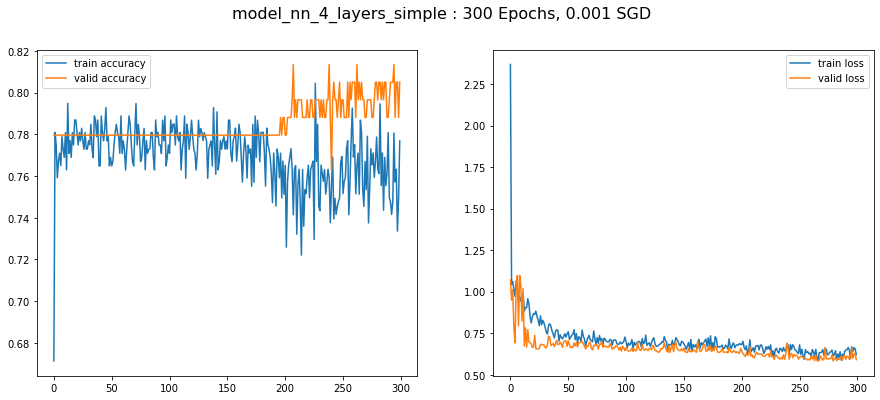

In [89]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

fig.suptitle(f"model_nn_4_layers_simple : 300 Epochs, 0.001 SGD", fontsize=16)
ax1.plot(history['train_acc'], label='train accuracy')
ax1.plot(history['valid_acc'], label='valid accuracy')
ax1.legend()


ax2.plot(history['train_loss'], label='train loss')
ax2.plot(history['valid_loss'], label='valid loss')
ax2.legend()

fig.show()

In [90]:
model_4_layers.eval()
valid_history = model_4_layers.evaluate_validation(test_dl, device)
valid_history

[{'val_loss': tensor(0.5911), 'val_acc': tensor(0.8051)}]

In [91]:
def predict_single(input, target, model):
    predictions = model(input) 
    #prediction=(predictions==torch.max(predictions)).nonzero().squeeze()
    return predictions

In [92]:
input=x_test_tensor
target=y_test_tensor

In [93]:
predictions=predict_single(input, target, model_4_layers)
preds=[]
for i in range(predictions.size()[0]):
    preds.append((predictions[i]==torch.max(predictions[i])).nonzero().squeeze().tolist())
target=target.tolist()


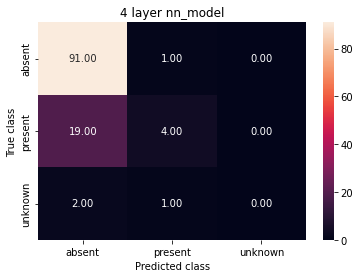

In [94]:
# heat map
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, preds) 
cm
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["absent","present","unknown"] , yticklabels = ["absent","present","unknown"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('4 layer nn_model')
plt.savefig('4 layer knn_model')